<a href="https://colab.research.google.com/github/kul-pat/Public-Machine-learning/blob/main/Heart_failure_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
print( 'Shape of DataFrame: {}'.format(df.shape))
print (df.loc[1])

Shape of DataFrame: (299, 13)
age                             55.00
anaemia                          0.00
creatinine_phosphokinase      7861.00
diabetes                         0.00
ejection_fraction               38.00
high_blood_pressure              0.00
platelets                   263358.03
serum_creatinine                 1.10
serum_sodium                   136.00
sex                              1.00
smoking                          0.00
time                             6.00
DEATH_EVENT                      1.00
Name: 1, dtype: float64


In [ ]:
# print the shape and data type of the dataframe
print(df.shape)
print(df.dtypes)

(299, 13)
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.shape

(299, 13)

In [ ]:
X = np.array(df.drop(['DEATH_EVENT'], 1))
y = np.array(df['DEATH_EVENT'])

In [ ]:
X[0]

array([7.50e+01, 0.00e+00, 5.82e+02, 0.00e+00, 2.00e+01, 1.00e+00,
       2.65e+05, 1.90e+00, 1.30e+02, 1.00e+00, 0.00e+00, 4.00e+00])

In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [ ]:
X[0]

array([ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, -8.47579380e-01,
       -1.53055953e+00,  1.35927151e+00,  1.68164843e-02,  4.90056987e-01,
       -1.50403612e+00,  7.35688190e-01, -6.87681906e-01, -1.62950241e+00])

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=0, test_size = 0.2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(239, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [ ]:
# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=12, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history =model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2798 - accuracy: 0.8787 - val_loss: 0.4574 - val_accuracy: 0.8167
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8661 - val_loss: 0.4522 - val_accuracy: 0.8167
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3082 - accuracy: 0.8703 - val_loss: 0.4523 - val_accuracy: 0.8167
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.9038 - val_loss: 0.4616 - val_accuracy: 0.8167
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8787 - val_loss: 0.4582 - val_accuracy: 0.8167
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8703 - val_loss: 0.4591 - val_accuracy: 0.8167
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.8954 - val_loss: 0.4701 - val_accuracy: 0.8167
Epoch 8/50
24/24 [==

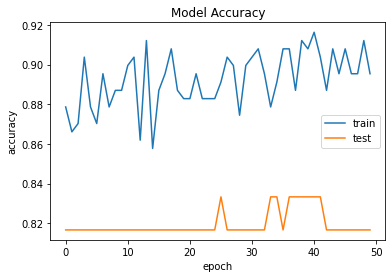

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

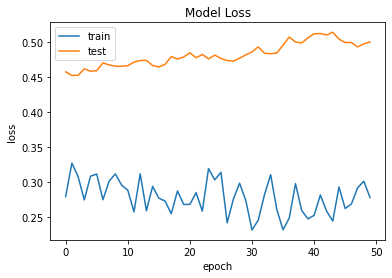

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [ ]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=12, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
24/24 [==============================] - 1s 8ms/step - loss: 0.6899 - accuracy: 0.6109 - val_loss: 0.6827 - val_accuracy: 0.7000
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.7280 - val_loss: 0.6744 - val_accuracy: 0.6833
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.7113 - val_loss: 0.6651 - val_accuracy: 0.7000
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.7197 - val_loss: 0.6513 - val_accuracy: 0.7500
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6479 - accuracy: 0.7322 - val_loss: 0.6342 - val_accuracy: 0.7500
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.7364 - val_loss: 0.6129 - val_accuracy: 0.8000
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7573 - val_loss: 0.5876 - val_accuracy: 0.8333
Epoch 8/50
24/24 [==

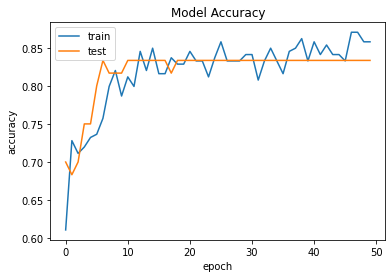

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

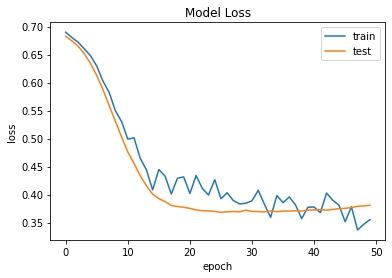

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()